In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',2000)

In [77]:
df=pd.DataFrame([])

nome_meses=['jan','fev','mar','abr','mai','jun','jul','ago','set','out','nov','dez']

for y in range (4,10):  # 4 de 201'4' e 10 significa que vai até o 9 de 201'9'
    for m in nome_meses:
        c=pd.read_excel(r'C:\Users\Katia Suely\Desktop\Planilhas do programa\201{}\201{}{}.xlsx'.format(y,y,m))
        df=df.append(c)
df.set_index('Unnamed: 0',inplace=True)
A=df.index ## Para utilizar o index em outro conjunto de dados que criarmos

In [103]:
T = np.pi/180                         #Transformação para radianos
 
sind=lambda a:np.sin(T*a)           
cosd=lambda a:np.cos(T*a)           
tand=lambda a:np.tan(T*a)           
acosd=lambda a:(1/T)*np.arccos(a)   
asind=lambda a:(1/T)*np.arcsin(a)   
atand=lambda a:(1/T)*np.arctan(a)

In [104]:
N=np.arange(1,366)
np.shape(N)

(365,)

In [105]:
B = (N - 81)*360/364
np.shape(B)

(365,)

In [106]:
ET =9.87*sind(2*B)-7.53*cosd(B)-1.5*sind(B)
np.shape(ET)

(365,)

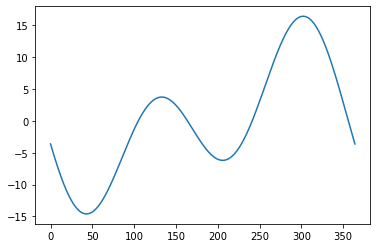

In [107]:
plt.plot(ET)

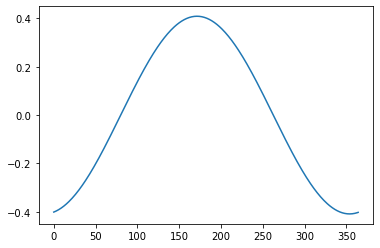

In [108]:
#Declinação Solar
deltagraus =23.45*sind((360/365*(284 + N)))
deltarad=deltagraus*(np.pi/180)
plt.plot(deltarad)
plt.show()

In [119]:
HPL =np.arange(0,24*60,60)
HPL

array([   0,   60,  120,  180,  240,  300,  360,  420,  480,  540,  600,
        660,  720,  780,  840,  900,  960, 1020, 1080, 1140, 1200, 1260,
       1320, 1380])

In [120]:
HV = 0                                             # Horário de Verão (0 ou 60 minutos)
SL = 45                                            # Longitude Padrão Local
Long = 35.20298                                    # Longitude do Local (Natal-RN)
D = 1                                              # 0 para local a leste e 1 a oeste de Greenwich
TSA=[]

if D==0:
    for i in range(365):
        for j in range(24):
            TSA[i+j] = HPL[j] + ET[i] - 4*(SL - Long) - HV             
else:
    for i in range(365):
        for j in range(24): 
            TSA.append(HPL[j] + ET[i] + 4*(SL - Long) - HV)

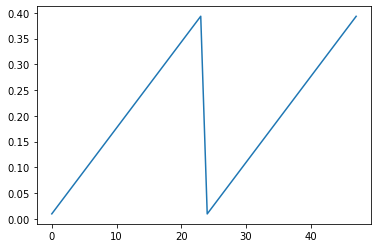

In [137]:
TSA=np.array(TSA)/60
plt.plot(TSA[0:48])

In [122]:
hhora = (HPL/60 - 12)*15
hhorarad = hhora*np.pi/180
hhorarad

array([-3.14159265, -2.87979327, -2.61799388, -2.35619449, -2.0943951 ,
       -1.83259571, -1.57079633, -1.30899694, -1.04719755, -0.78539816,
       -0.52359878, -0.26179939,  0.        ,  0.26179939,  0.52359878,
        0.78539816,  1.04719755,  1.30899694,  1.57079633,  1.83259571,
        2.0943951 ,  2.35619449,  2.61799388,  2.87979327])

In [129]:
#Calculo do zenite

L = -5.8487   #Latitude Local
alfa=[]
zenite=[]
for i in range(0,365):
    for j in range(24):
          alfa.append(asind(sind(L)*sind(deltagraus[i])+cosd(L)*cosd(hhora[j])*cosd(deltagraus[i]))) 


In [130]:
zenite=90-np.array(alfa)
zenite

array([151.13966327, 147.62903966, 138.86199268, ..., 127.38279558,
       138.81334909, 147.56390016])

In [51]:
#Fotoperíodo=0.1333*acosd(-tand(L)*tand(delta))
#foto=pd.DataFrame(Fotoperíodo)

In [141]:
Hss=acosd(-tand(L)*tand(deltagraus))
Hss

array([92.49347897, 92.48367042, 92.47305335, 92.46163402, 92.44941914,
       92.43641583, 92.42263161, 92.40807441, 92.39275252, 92.37667459,
       92.35984963, 92.34228697, 92.32399626, 92.30498744, 92.28527074,
       92.26485664, 92.24375588, 92.22197943, 92.19953845, 92.17644431,
       92.15270857, 92.12834294, 92.10335926, 92.07776952, 92.05158581,
       92.02482031, 91.99748531, 91.96959313, 91.94115615, 91.9121868 ,
       91.88269752, 91.85270076, 91.82220898, 91.7912346 , 91.75979004,
       91.72788766, 91.69553979, 91.66275868, 91.62955653, 91.59594546,
       91.5619375 , 91.5275446 , 91.4927786 , 91.45765125, 91.42217416,
       91.38635887, 91.35021676, 91.31375911, 91.27699707, 91.23994166,
       91.20260377, 91.16499416, 91.12712344, 91.08900212, 91.05064056,
       91.01204897, 90.97323745, 90.93421597, 90.89499436, 90.85558232,
       90.81598946, 90.77622523, 90.73629897, 90.69621994, 90.65599724,
       90.61563992, 90.57515688, 90.53455696, 90.49384889, 90.45

In [136]:
#Radiação extraterrestre 
I_et=[]
Io=1367
for i in range(365*24):
    I_et.append(Io*(1+0.033*np.cos(np.deg2rad(360*i)/(365))*np.cos(np.deg2rad(zenite[i]))))    
    if I_et[i]<0:
        I_et.append(0)


In [146]:
#Integração de I_et horizontal
HoJ=(24*3600*Io/np.pi)*(1+0.033*cosd(360*N/365))*(cosd(L)*cosd(deltagraus)*sind(Hss)+(np.pi*Hss/180)*sind(L)*sind(deltagraus))
HoJ

array([38022979.63748465, 38035434.5902806 , 38048533.15806918,
       38062250.52008779, 38076560.11609571, 38091433.6801628 ,
       38106841.27685977, 38122751.33982007, 38139130.71264067,
       38155944.69208618, 38173157.07355792, 38190730.198787  ,
       38208625.00570667, 38226801.08045735, 38245216.71147353,
       38263828.94559934, 38282593.64617627, 38301465.55304315,
       38320398.34438539, 38339344.70036723, 38358256.36847755,
       38377084.23051623, 38395778.37114517, 38414288.14792451,
       38432562.26275155, 38450548.83461645, 38468195.47358588,
       38485449.35592262, 38502257.30024578, 38518565.84463387,
       38534321.32456972, 38549469.95162349, 38563957.89276771,
       38577731.35021532, 38590736.64166965, 38602920.28087305,
       38614229.0583386 , 38624610.12214773, 38634011.05869478,
       38642379.97325817, 38649665.57027637, 38655817.23320618,
       38660785.1038397 , 38664520.16095603, 38666974.2981834 ,
       38668100.40094732, 38667852.42238

In [147]:
#Traformando em Watts*H/M²
HoW=HoJ/3600
HoW

array([10561.93878819, 10565.3984973 , 10569.03698835, 10572.84736669,
       10576.82225447, 10580.95380005, 10585.23368802, 10589.65314995,
       10594.20297573, 10598.87352558, 10603.65474265, 10608.53616633,
       10613.50694603, 10618.55585568, 10623.67130874, 10628.84137378,
       10634.0537906 , 10639.29598696, 10644.55509566, 10649.81797232,
       10655.07121347, 10660.30117514, 10665.49399198, 10670.63559665,
       10675.71173965, 10680.70800962, 10685.60985377, 10690.40259887,
       10695.07147229, 10699.60162351, 10703.97814571, 10708.18609767,
       10712.21052577, 10716.03648617, 10719.64906713, 10723.03341135,
       10726.17473843, 10729.05836726, 10731.66973853, 10733.99443702,
       10736.01821397, 10737.72700922, 10739.10697329, 10740.14448915,
       10740.82619394, 10741.13900026, 10741.07011733, 10740.60707169,
       10739.73772765, 10738.45030729, 10736.73341005, 10734.57603188,
       10731.96758386, 10728.89791034, 10725.3573065 , 10721.33653537,
      

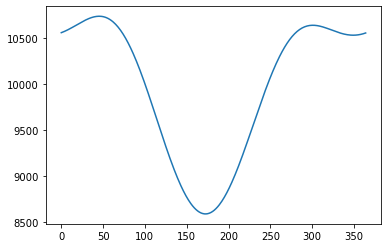

In [148]:
plt.plot(HoW)

In [55]:
df

,SolarRad,Rain,TempOut,FilledData
Unnamed: 0,,,,
2014-01-01 00:00:00,0.0,0.0,26300.0,Lavat
2014-01-01 00:10:00,0.0,0.0,26200.0,Lavat
2014-01-01 00:20:00,0.0,0.0,26200.0,Lavat
2014-01-01 00:30:00,0.0,0.0,26100.0,Lavat
2014-01-01 00:40:00,0.0,0.0,26200.0,Lavat
...,...,...,...,...
2019-12-31 23:10:00,0.0,0.0,27100.0,Lavat
2019-12-31 23:20:00,0.0,0.0,27000.0,Lavat
2019-12-31 23:30:00,0.0,0.0,27100.0,Lavat


In [56]:
jan2014=[];jan2015=[];jan2016=[];jan2017=[];jan2018=[];jan2019=[];
fev2014=[];fev2015=[];fev2016=[];fev2017=[];fev2018=[];fev2019=[];
mar2014=[];mar2015=[];mar2016=[];mar2017=[];mar2018=[];mar2019=[];
abr2014=[];abr2015=[];abr2016=[];abr2017=[];abr2018=[];abr2019=[];
mai2014=[];mai2015=[];mai2016=[];mai2017=[];mai2018=[];mai2019=[];
jun2014=[];jun2015=[];jun2016=[];jun2017=[];jun2018=[];jun2019=[];
jul2014=[];jul2015=[];jul2016=[];jul2017=[];jul2018=[];jul2019=[];
ago2014=[];ago2015=[];ago2016=[];ago2017=[];ago2018=[];ago2019=[];
set2014=[];set2015=[];set2016=[];set2017=[];set2018=[];set2019=[];
out2014=[];out2015=[];out2016=[];out2017=[];out2018=[];out2019=[];
nov2014=[];nov2015=[];nov2016=[];nov2017=[];nov2018=[];nov2019=[];
dez2014=[];dez2015=[];dez2016=[];dez2017=[];dez2018=[];dez2019=[];

In [57]:
for i in range(1,32):
    jan2014.append(df.SolarRad.loc['2014-01-{:02}'.format(i)].sum()*(1/6))
    jan2015.append(df.SolarRad.loc['2015-01-{:02}'.format(i)].sum()*(1/6))
    jan2016.append(df.SolarRad.loc['2016-01-{:02}'.format(i)].sum()*(1/6))
    jan2017.append(df.SolarRad.loc['2017-01-{:02}'.format(i)].sum()*(1/6))
    jan2018.append(df.SolarRad.loc['2018-01-{:02}'.format(i)].sum()*(1/6))
    jan2019.append(df.SolarRad.loc['2019-01-{:02}'.format(i)].sum()*(1/6))
    
for i in range(1,29):
    fev2014.append(df.SolarRad.loc['2014-02-{:02}'.format(i)].sum()*(1/6))
    fev2015.append(df.SolarRad.loc['2015-02-{:02}'.format(i)].sum()*(1/6))  
    fev2017.append(df.SolarRad.loc['2017-02-{:02}'.format(i)].sum()*(1/6))
    fev2018.append(df.SolarRad.loc['2018-02-{:02}'.format(i)].sum()*(1/6))
    fev2019.append(df.SolarRad.loc['2019-02-{:02}'.format(i)].sum()*(1/6))
    
for i in range(1,30):
    fev2016.append(df.SolarRad.loc['2016-02-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    mar2014.append(df.SolarRad.loc['2014-03-{:02}'.format(i)].sum()*(1/6))
    mar2015.append(df.SolarRad.loc['2015-03-{:02}'.format(i)].sum()*(1/6))
    mar2016.append(df.SolarRad.loc['2016-03-{:02}'.format(i)].sum()*(1/6))
    mar2017.append(df.SolarRad.loc['2017-03-{:02}'.format(i)].sum()*(1/6))
    mar2018.append(df.SolarRad.loc['2018-03-{:02}'.format(i)].sum()*(1/6))
    mar2019.append(df.SolarRad.loc['2019-03-{:02}'.format(i)].sum()*(1/6))

for i in range(1,31):
    abr2014.append(df.SolarRad.loc['2014-04-{:02}'.format(i)].sum()*(1/6))
    abr2015.append(df.SolarRad.loc['2015-04-{:02}'.format(i)].sum()*(1/6))
    abr2016.append(df.SolarRad.loc['2016-04-{:02}'.format(i)].sum()*(1/6))
    abr2017.append(df.SolarRad.loc['2017-04-{:02}'.format(i)].sum()*(1/6))
    abr2018.append(df.SolarRad.loc['2018-04-{:02}'.format(i)].sum()*(1/6))
    abr2019.append(df.SolarRad.loc['2019-04-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    mai2014.append(df.SolarRad.loc['2014-05-{:02}'.format(i)].sum()*(1/6))
    mai2015.append(df.SolarRad.loc['2015-05-{:02}'.format(i)].sum()*(1/6))
    mai2016.append(df.SolarRad.loc['2016-05-{:02}'.format(i)].sum()*(1/6))
    mai2017.append(df.SolarRad.loc['2017-05-{:02}'.format(i)].sum()*(1/6))
    mai2018.append(df.SolarRad.loc['2018-05-{:02}'.format(i)].sum()*(1/6))
    mai2019.append(df.SolarRad.loc['2019-05-{:02}'.format(i)].sum()*(1/6))

for i in range(1,31):
    jun2014.append(df.SolarRad.loc['2014-06-{:02}'.format(i)].sum()*(1/6))
    jun2015.append(df.SolarRad.loc['2015-06-{:02}'.format(i)].sum()*(1/6))
    jun2016.append(df.SolarRad.loc['2016-06-{:02}'.format(i)].sum()*(1/6))
    jun2017.append(df.SolarRad.loc['2017-06-{:02}'.format(i)].sum()*(1/6))
    jun2018.append(df.SolarRad.loc['2018-06-{:02}'.format(i)].sum()*(1/6))
    jun2019.append(df.SolarRad.loc['2019-06-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    jul2014.append(df.SolarRad.loc['2014-07-{:02}'.format(i)].sum()*(1/6))
    jul2015.append(df.SolarRad.loc['2015-07-{:02}'.format(i)].sum()*(1/6))
    jul2016.append(df.SolarRad.loc['2016-07-{:02}'.format(i)].sum()*(1/6))
    jul2017.append(df.SolarRad.loc['2017-07-{:02}'.format(i)].sum()*(1/6))
    jul2018.append(df.SolarRad.loc['2018-07-{:02}'.format(i)].sum()*(1/6))
    jul2019.append(df.SolarRad.loc['2019-07-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    ago2014.append(df.SolarRad.loc['2014-08-{:02}'.format(i)].sum()*(1/6))
    ago2015.append(df.SolarRad.loc['2015-08-{:02}'.format(i)].sum()*(1/6))
    ago2016.append(df.SolarRad.loc['2016-08-{:02}'.format(i)].sum()*(1/6))
    ago2017.append(df.SolarRad.loc['2017-08-{:02}'.format(i)].sum()*(1/6))
    ago2018.append(df.SolarRad.loc['2018-08-{:02}'.format(i)].sum()*(1/6))
    ago2019.append(df.SolarRad.loc['2019-08-{:02}'.format(i)].sum()*(1/6))

for i in range(1,31):
    set2014.append(df.SolarRad.loc['2014-09-{:02}'.format(i)].sum()*(1/6))
    set2015.append(df.SolarRad.loc['2015-09-{:02}'.format(i)].sum()*(1/6))
    set2016.append(df.SolarRad.loc['2016-09-{:02}'.format(i)].sum()*(1/6))
    set2017.append(df.SolarRad.loc['2017-09-{:02}'.format(i)].sum()*(1/6))
    set2018.append(df.SolarRad.loc['2018-09-{:02}'.format(i)].sum()*(1/6))
    set2019.append(df.SolarRad.loc['2019-09-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    out2014.append(df.SolarRad.loc['2014-10-{:02}'.format(i)].sum()*(1/6))
    out2015.append(df.SolarRad.loc['2015-10-{:02}'.format(i)].sum()*(1/6))
    out2016.append(df.SolarRad.loc['2016-10-{:02}'.format(i)].sum()*(1/6))
    out2017.append(df.SolarRad.loc['2017-10-{:02}'.format(i)].sum()*(1/6))
    out2018.append(df.SolarRad.loc['2018-10-{:02}'.format(i)].sum()*(1/6))
    out2019.append(df.SolarRad.loc['2019-10-{:02}'.format(i)].sum()*(1/6))

for i in range(1,31):
    nov2014.append(df.SolarRad.loc['2014-11-{:02}'.format(i)].sum()*(1/6))
    nov2015.append(df.SolarRad.loc['2015-11-{:02}'.format(i)].sum()*(1/6))
    nov2016.append(df.SolarRad.loc['2016-11-{:02}'.format(i)].sum()*(1/6))
    nov2017.append(df.SolarRad.loc['2017-11-{:02}'.format(i)].sum()*(1/6))
    nov2018.append(df.SolarRad.loc['2018-11-{:02}'.format(i)].sum()*(1/6))
    nov2019.append(df.SolarRad.loc['2019-11-{:02}'.format(i)].sum()*(1/6))

for i in range(1,32):
    dez2014.append(df.SolarRad.loc['2014-12-{:02}'.format(i)].sum()*(1/6))
    dez2015.append(df.SolarRad.loc['2015-12-{:02}'.format(i)].sum()*(1/6))
    dez2016.append(df.SolarRad.loc['2016-12-{:02}'.format(i)].sum()*(1/6))
    dez2017.append(df.SolarRad.loc['2017-12-{:02}'.format(i)].sum()*(1/6))
    dez2018.append(df.SolarRad.loc['2018-12-{:02}'.format(i)].sum()*(1/6))
    dez2019.append(df.SolarRad.loc['2019-12-{:02}'.format(i)].sum()*(1/6))

In [58]:
np.mean(jan2014)

6216.037634408603

In [59]:
tabela1=pd.DataFrame([])

tabela1['jan']=pd.Series([np.mean(jan2014),np.mean(jan2015),np.mean(jan2016),np.mean(jan2017),np.mean(jan2018),np.mean(jan2019)])
tabela1['fev']=pd.Series([np.mean(fev2014),np.mean(fev2015),np.mean(fev2016),np.mean(fev2017),np.mean(fev2018),np.mean(fev2019)])
tabela1['mar']=pd.Series([np.mean(mar2014),np.mean(mar2015),np.mean(mar2016),np.mean(mar2017),np.mean(mar2018),np.mean(mar2019)])
tabela1['abr']=pd.Series([np.mean(abr2014),np.mean(abr2015),np.mean(abr2016),np.mean(abr2017),np.mean(abr2018),np.mean(abr2019)])
tabela1['mai']=pd.Series([np.mean(mai2014),np.mean(mai2015),np.mean(mai2016),np.mean(mai2017),np.mean(mai2018),np.mean(mai2019)])
tabela1['jun']=pd.Series([np.mean(jun2014),np.mean(jun2015),np.mean(jun2016),np.mean(jun2017),np.mean(jun2018),np.mean(jun2019)])
tabela1['jul']=pd.Series([np.mean(jul2014),np.mean(jul2015),np.mean(jul2016),np.mean(jul2017),np.mean(jul2018),np.mean(jul2019)])
tabela1['ago']=pd.Series([np.mean(ago2014),np.mean(ago2015),np.mean(ago2016),np.mean(ago2017),np.mean(ago2018),np.mean(ago2019)])
tabela1['set']=pd.Series([np.mean(set2014),np.mean(set2015),np.mean(set2016),np.mean(set2017),np.mean(set2018),np.mean(set2019)])
tabela1['out']=pd.Series([np.mean(out2014),np.mean(out2015),np.mean(out2016),np.mean(out2017),np.mean(out2018),np.mean(out2019)])
tabela1['nov']=pd.Series([np.mean(nov2014),np.mean(nov2015),np.mean(nov2016),np.mean(nov2017),np.mean(nov2018),np.mean(nov2019)])
tabela1['dez']=pd.Series([np.mean(dez2014),np.mean(dez2015),np.mean(dez2016),np.mean(dez2017),np.mean(dez2018),np.mean(dez2019)])

tabela1.index = [2014,2015,2016,2017,2018,2019]

In [60]:
tabela1

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
2014,6216.037634,6544.017857,6679.188172,5918.627778,4895.645161,4652.661111,4845.870968,5987.709677,6267.622222,6832.075269,6893.555556,6582.075269
2015,6938.419355,6282.708333,5777.338710,6176.488889,5759.822581,4991.655556,4810.924731,5960.478495,6640.350000,6892.139785,7238.483333,6188.500000
2016,5018.349462,5918.511494,6284.758065,5198.633333,5421.983871,4991.527778,5626.768817,6050.580645,6893.838889,6993.903226,6961.627778,6494.553763
2017,6727.849462,6429.779762,6056.887097,5542.088889,5124.725806,4440.150000,3469.510753,1499.032258,0.000000,2212.935484,6941.755556,6585.946237
2018,6372.887097,5676.845238,6027.102151,4834.350000,5004.403226,4781.394444,4700.569892,6028.397849,6347.633333,6906.677419,6732.961111,6258.096774
2019,6202.833333,4752.613095,4916.639785,4819.727778,5040.553763,3708.783333,4480.193548,5557.973118,6006.611111,6737.672043,7153.172222,6629.102151


In [61]:
tabela2 = pd.DataFrame([])

tabela2['jan']=pd.Series(tabela1.jan.mean())
tabela2['fev']=pd.Series(tabela1.fev.mean())
tabela2['mar']=pd.Series(tabela1.mar.mean())
tabela2['abr']=pd.Series(tabela1.abr.mean())
tabela2['mai']=pd.Series(tabela1.mai.mean())
tabela2['jun']=pd.Series(tabela1.jun.mean())
tabela2['jul']=pd.Series(tabela1.jul.mean())
tabela2['ago']=pd.Series(tabela1.ago.mean())
tabela2['set']=pd.Series(tabela1.set.mean())
tabela2['out']=pd.Series(tabela1.out.mean())
tabela2['nov']=pd.Series(tabela1.nov.mean())
tabela2['dez']=pd.Series(tabela1.dez.mean())

tabela2.index = ["H"]

In [62]:
tabela2

,jan,fev,mar,abr,mai,jun,jul,ago,set,out,nov,dez
H,6246.062724,5934.079297,5956.985663,5414.986111,5207.855735,4594.362037,4655.639785,5180.695341,5359.342593,6095.900538,6986.925926,6456.379032


In [63]:
filt = (df.index.strftime("%H:%M:%S")>='05:00:00') & (df.index.strftime("%H:%M:%S")<='17:00:00')
periodosDiurnos=df.loc[filt]

In [64]:
tabelaDadosFaltantes=[]
for i in range(1,13):
    filt2=periodosDiurnos.index.strftime("%m")=='{:02}'.format(i)
    tabelaDadosFaltantes.append(periodosDiurnos.loc[filt2].FilledData.value_counts())

In [65]:
tabelaDadosFaltantes=pd.DataFrame(tabelaDadosFaltantes)
tabelaDadosFaltantes.index=[1,2,3,4,5,6,7,8,9,10,11,12]
tabelaDadosFaltantes['Total']=tabelaDadosFaltantes.Lavat+tabelaDadosFaltantes.Faltante
tabelaDadosFaltantes['%']=(tabelaDadosFaltantes.Faltante*100)/tabelaDadosFaltantes.Total
tabelaDadosFaltantes

,Lavat,Faltante,Total,%
1,13047,531,13578,3.910738
2,11218,1119,12337,9.070276
3,12324,1254,13578,9.235528
4,11766,1374,13140,10.456621
5,12467,1110,13577,8.175591
6,11048,2092,13140,15.920852
7,12038,1540,13578,11.341877
8,11312,2266,13578,16.688761
9,10725,2415,13140,18.378995
10,11934,1644,13578,12.107821


In [66]:
a=tabela2.loc['H']
a=pd.DataFrame(a)
b=tabelaDadosFaltantes['%']
b=pd.DataFrame(b)
b.index=a.index

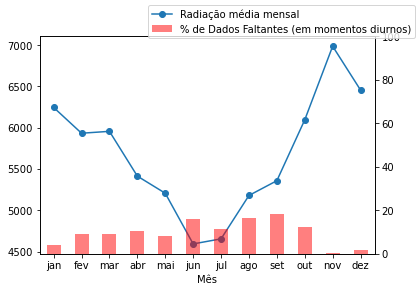

,Lavat,Faltante,Total,%
1,13047,531,13578,3.910738
2,11218,1119,12337,9.070276
3,12324,1254,13578,9.235528
4,11766,1374,13140,10.456621
5,12467,1110,13577,8.175591
6,11048,2092,13140,15.920852
7,12038,1540,13578,11.341877
8,11312,2266,13578,16.688761
9,10725,2415,13140,18.378995
10,11934,1644,13578,12.107821


In [67]:
df = pd.DataFrame({"Mês": ["jan","fev","mar","abr","mai","jun","jul","ago","set","out","nov","dez"],
                   "Radiação média mensal": a['H'], 
                   "% de Dados Faltantes (em momentos diurnos)": b['%']})
ax = df.plot(x="Mês", marker='o', y="Radiação média mensal", legend=False)
ax2 = ax.twinx()
df.plot(ylim=(0,100),kind='bar',ls='dashed', alpha = 0.5, lw=7,x="Mês", y="% de Dados Faltantes (em momentos diurnos)", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()
tabelaDadosFaltantes